# Rain and temperature relation and prediction in Bangladesh

In [ ]:
# importing libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the df
df = pd.read_csv("/content/drive/MyDrive/data.csv")
print(df.head())


       tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150


In [ ]:
# some vars
month_labels = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

# 1. plot rain vs temp scatter plot

This plot represent rain vs temp relation with color intensity. In the plot we can see in low temp bellow 16 degree there is a very little rain. Means in winter season in bangladesh it doesn't rain much, near about 0 mm rain. Also in high temp the rain starts to increase. About 200-1000mm rain falls in temp range of 26 to greater than 30 degree celcious.

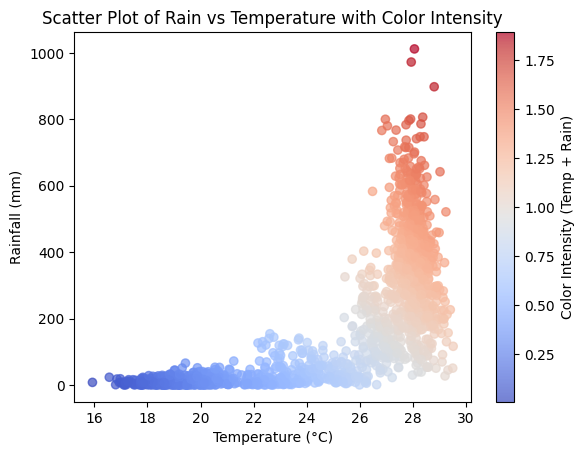

In [ ]:
# Normalize the data for better color scaling
df["temp_norm"] = (df["tem"] - df["tem"].min()) / (df["tem"].max() - df["tem"].min())
df["rain_norm"] = (df["rain"] - df["rain"].min()) / (
    df["rain"].max() - df["rain"].min()
)
# Calculate a combined color intensity based on both normalized temperature and rain
df["color_intensity"] = df["temp_norm"] + df["rain_norm"]

scatter = plt.scatter(
    x=df["tem"], y=df["rain"], c=df["color_intensity"], cmap="coolwarm", alpha=0.7
)
plt.colorbar(scatter, label="Color Intensity (Temp + Rain)")

plt.title("Scatter Plot of Rain vs Temperature with Color Intensity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.show()

# 2. boxplot of rainfall by month

This plot shows average monthly rainfall distribution over the years(1901-2021). The plot shows july is the heaviest rainfall month of the year, rain. Heavy rainfall starts in May an continues till September.

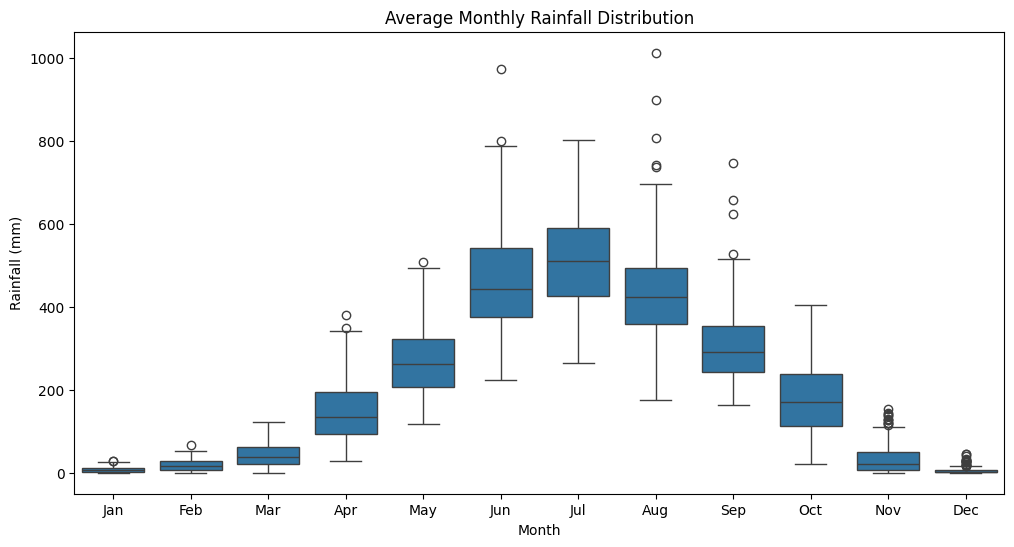

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="rain", data=df)
plt.title("Average Monthly Rainfall Distribution")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.xticks(range(0, 12), labels=month_labels)
plt.show()

# 3. plot temperature by month

This plot shows average monthly temp distribution over the years(1901-2021). The plot shows April-October is the hottest months of the year. Temp starts rising from March, starts decline in November. Dec, Jan and Feb are the coolest months of the year on average.

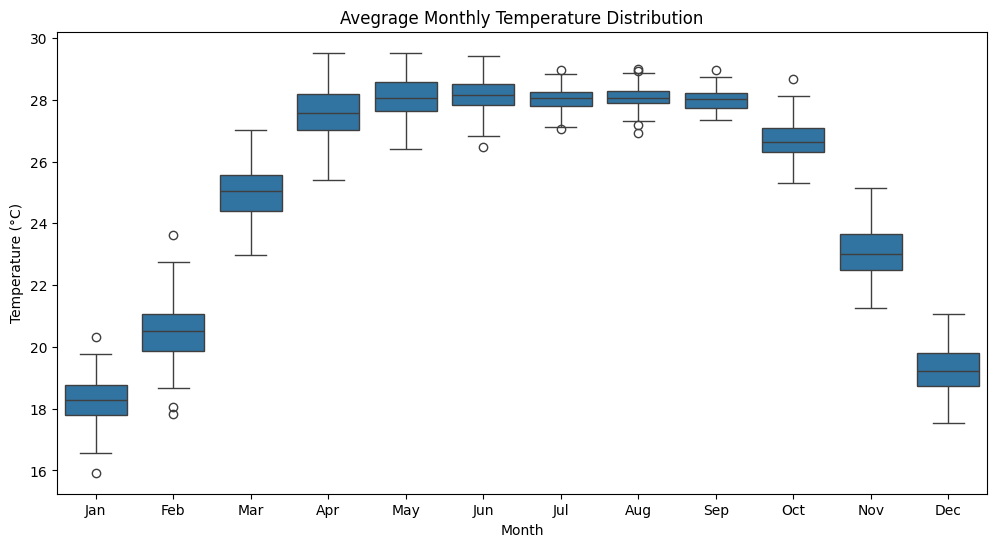

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="tem", data=df)
plt.title("Avegrage Monthly Temperature Distribution")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(range(0, 12), labels=month_labels)
plt.show()

# 4. plot yearly trend of temperature and rainfall

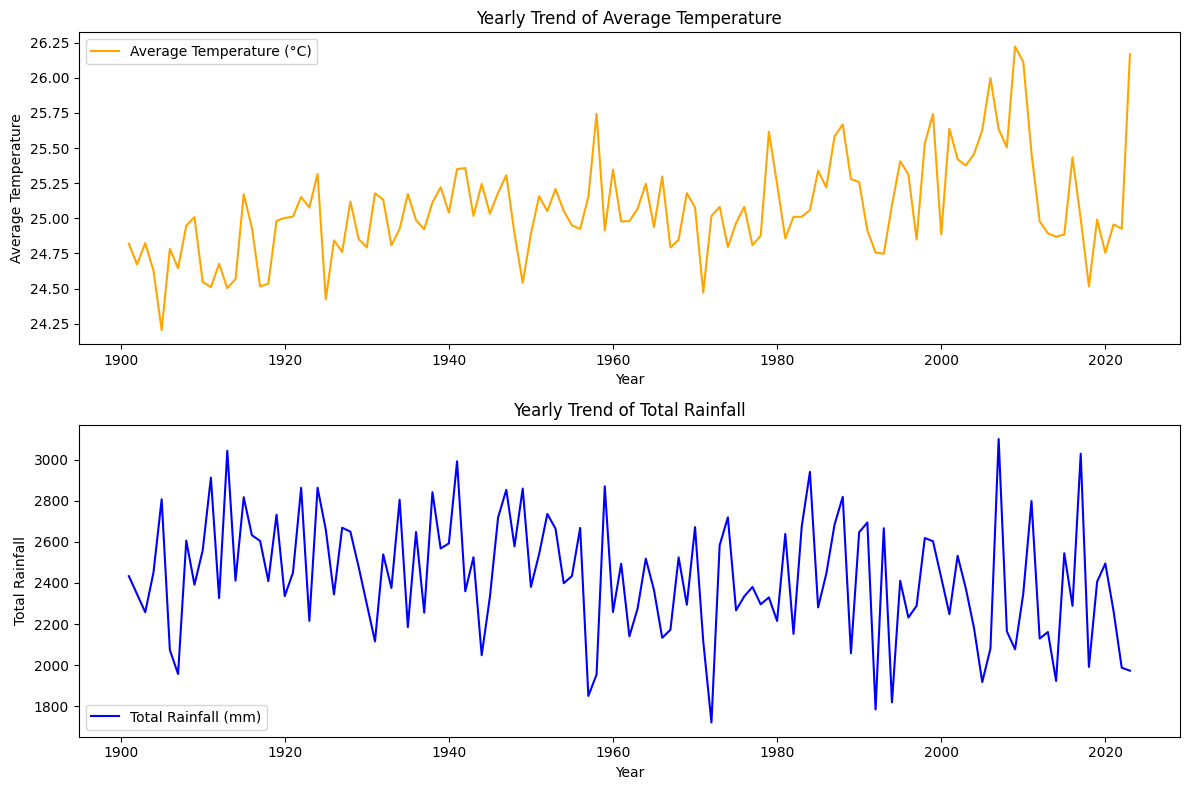

In [ ]:
# Calculate the yearly average for temperature and rainfall
yearly_data = df.groupby("Year").agg({"tem": "mean", "rain": "sum"}).reset_index()

# Rename columns for clarity
yearly_data.columns = ['Year', 'avg_tem', 'total_rain']

# Plot the yearly trend of temperature and rainfall
plt.figure(figsize=(12, 8))
# Plot for Average Temperature
plt.subplot(2, 1, 1)
plt.plot(yearly_data['Year'], yearly_data['avg_tem'], label='Average Temperature (°C)', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Yearly Trend of Average Temperature')
plt.legend()

# Plot for Total Rainfall
plt.subplot(2, 1, 2)
plt.plot(yearly_data['Year'], yearly_data['total_rain'], label='Total Rainfall (mm)', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.title('Yearly Trend of Total Rainfall')
plt.legend()

plt.tight_layout()
plt.show()

# ML Models

Temperature Prediction Results
                         Model       MAE        MSE        R2
0            Linear Regression  3.124313  12.471493  0.010940
1      Decision Tree Regressor  0.651666   0.792865  0.937121
2      Random Forest Regressor  0.555084   0.561588  0.955463
3  Gradient Boosting Regressor  0.457748   0.376565  0.970136
4     Support Vector Regressor  2.776335  15.705385 -0.245526

Rainfall Prediction Results
                         Model         MAE           MSE        R2
0            Linear Regression  162.589316  37822.403438  0.030935
1      Decision Tree Regressor   71.173995  12145.716253  0.688809
2      Random Forest Regressor   64.131743   9346.587404  0.760527
3  Gradient Boosting Regressor   57.070914   7210.445656  0.815258
4     Support Vector Regressor  166.280288  42918.912209 -0.099644


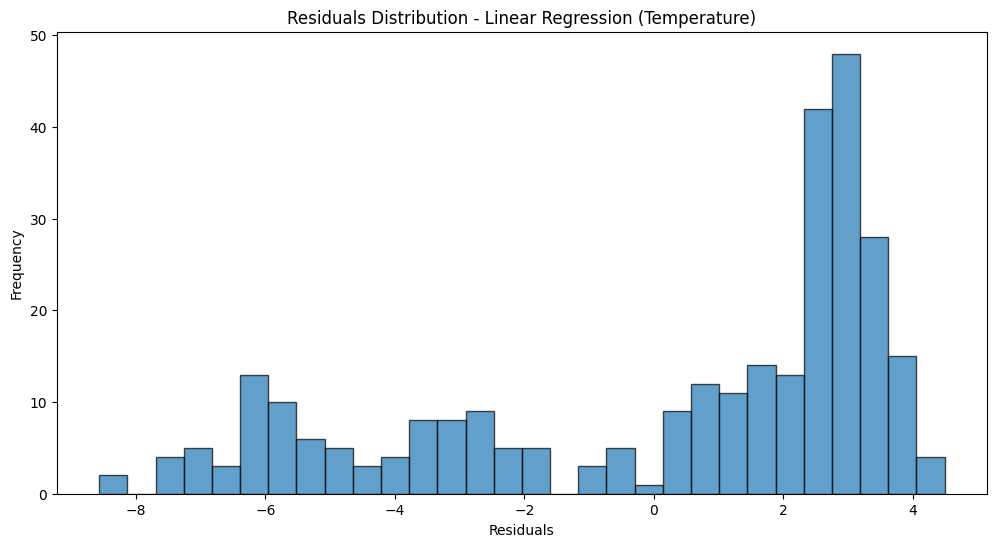

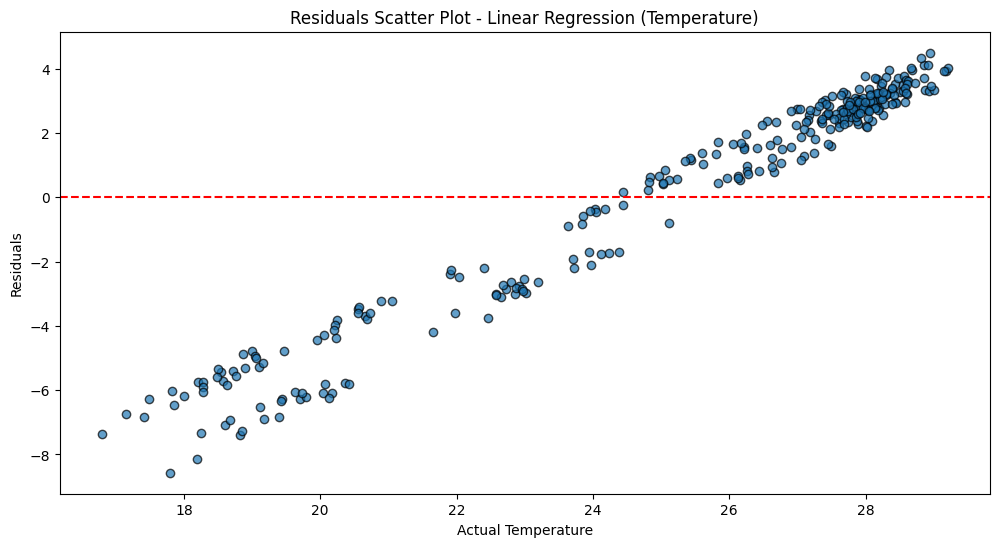

Summary Statistics for Residuals - Linear Regression (Temperature)
count    295.000000
mean       0.233643
std        3.529750
min       -8.569770
25%       -2.792285
50%        2.129027
75%        2.944911
max        4.495309
Name: tem, dtype: float64




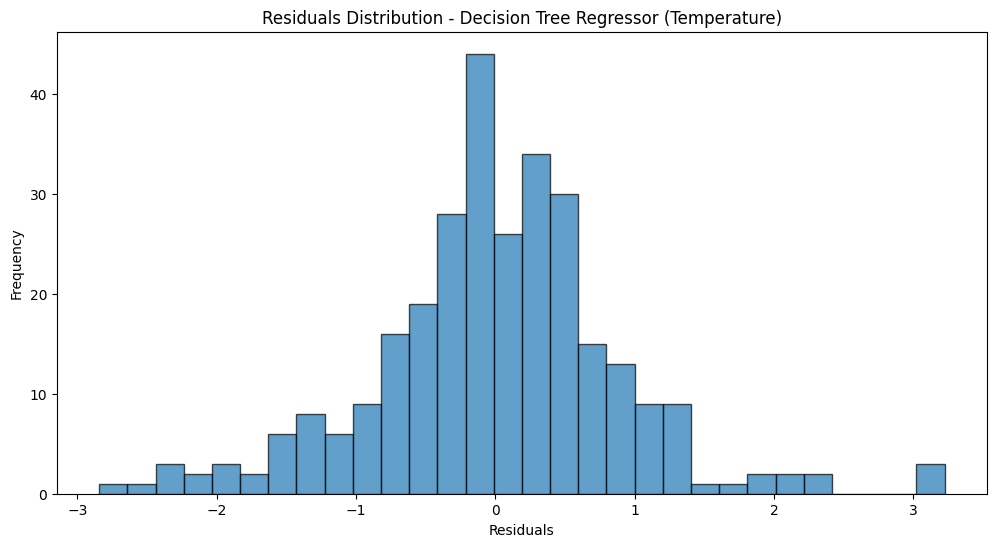

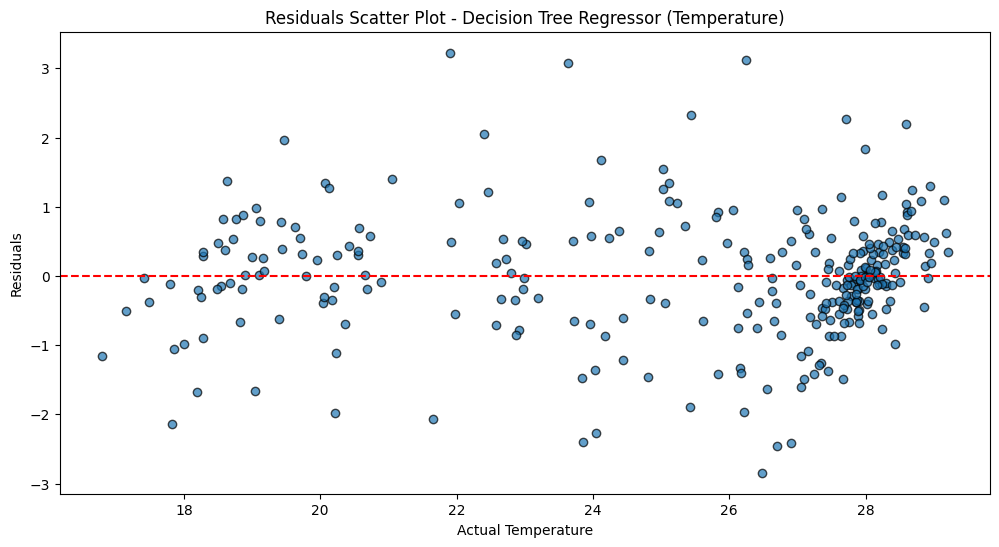

Summary Statistics for Residuals - Decision Tree Regressor (Temperature)
count    295.000000
mean       0.001442
std        0.891942
min       -2.844000
25%       -0.451650
50%       -0.011600
75%        0.487498
max        3.225600
Name: tem, dtype: float64




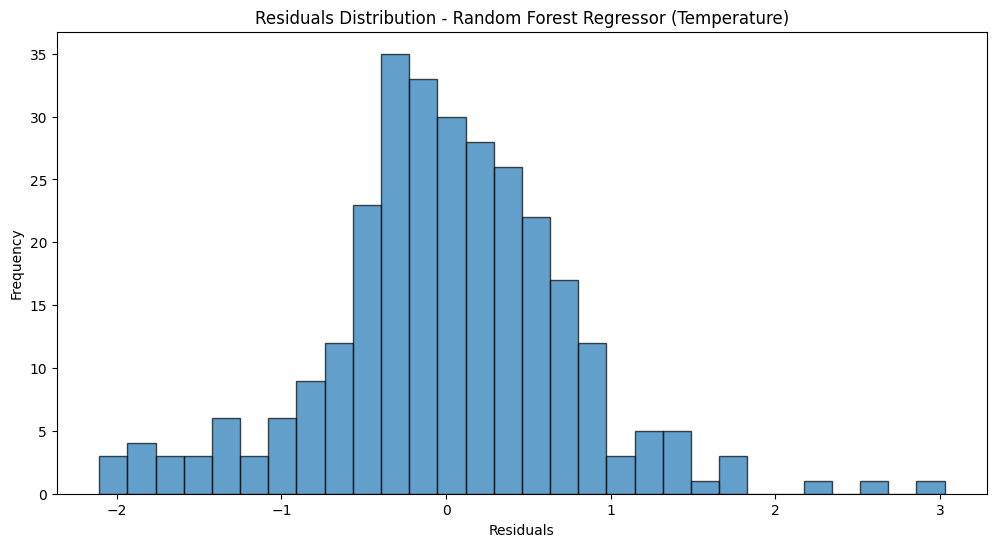

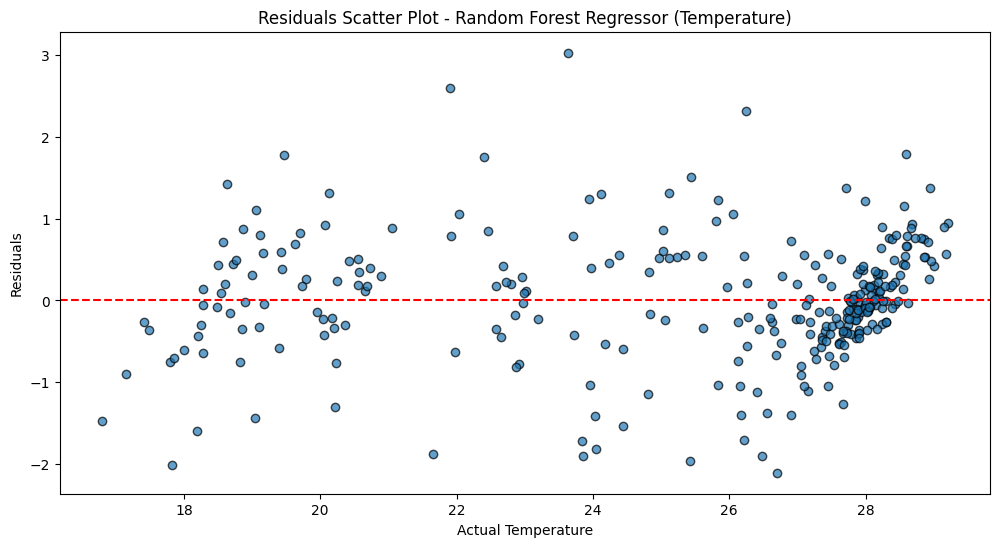

Summary Statistics for Residuals - Random Forest Regressor (Temperature)
count    295.000000
mean       0.001944
std        0.750663
min       -2.107332
25%       -0.372384
50%       -0.024428
75%        0.441658
max        3.029097
Name: tem, dtype: float64




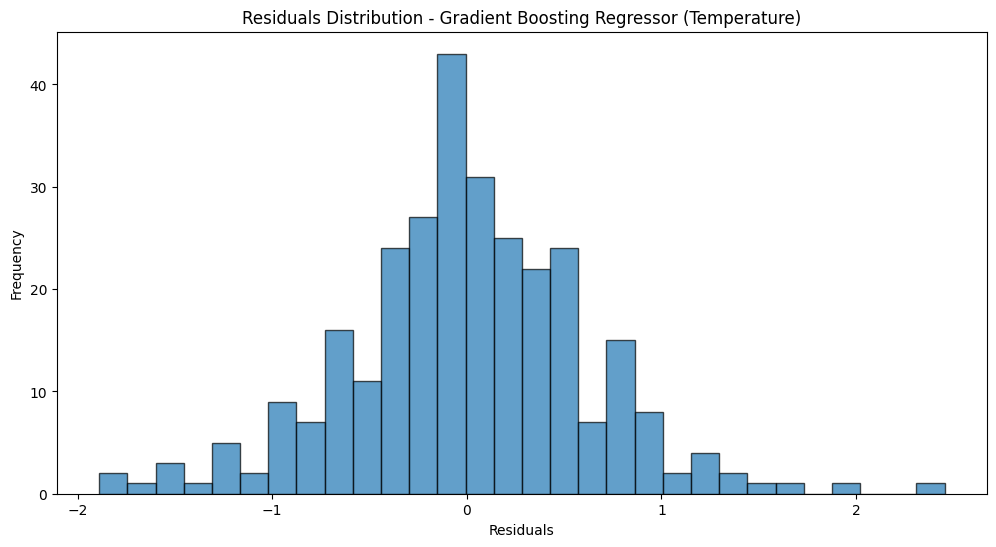

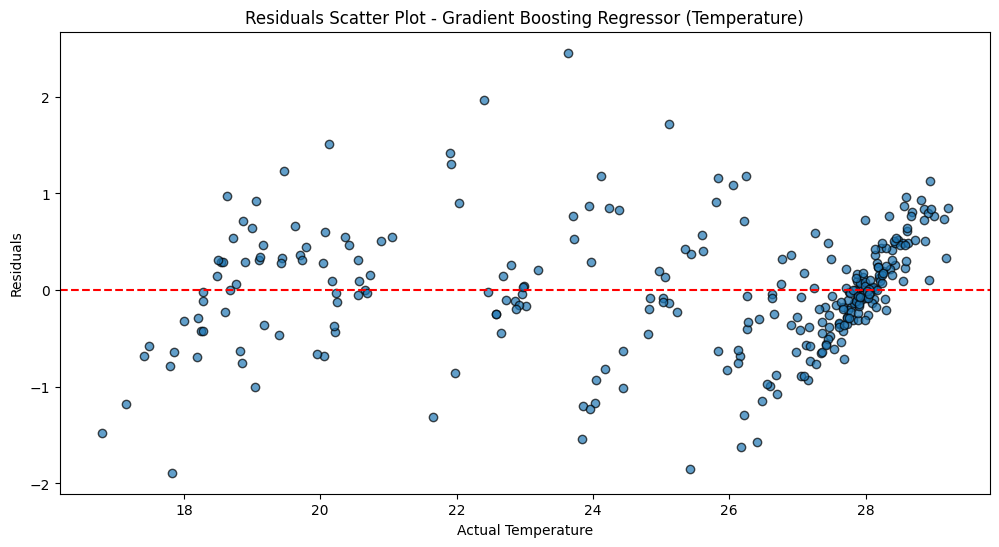

Summary Statistics for Residuals - Gradient Boosting Regressor (Temperature)
count    295.000000
mean      -0.003648
std        0.614681
min       -1.889014
25%       -0.335757
50%       -0.024732
75%        0.336835
max        2.455216
Name: tem, dtype: float64




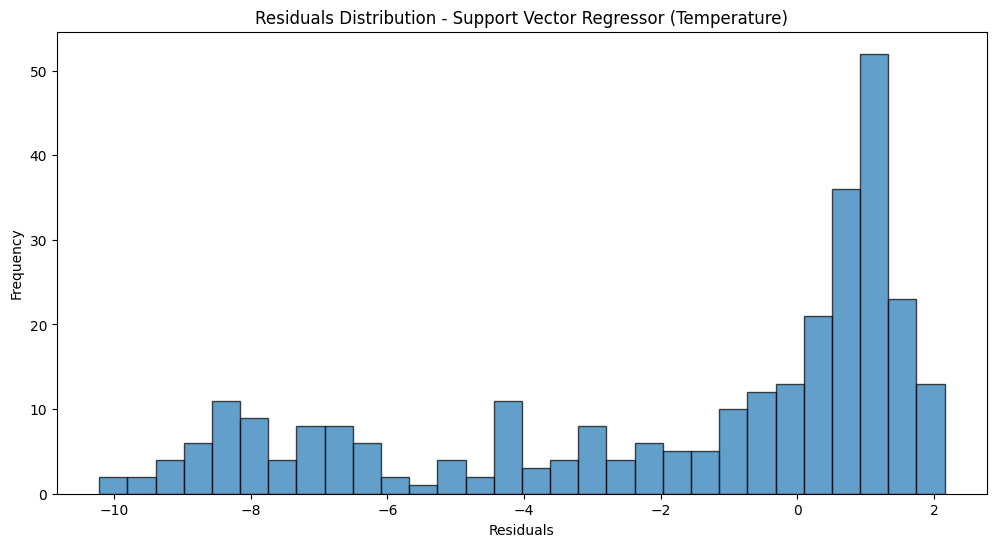

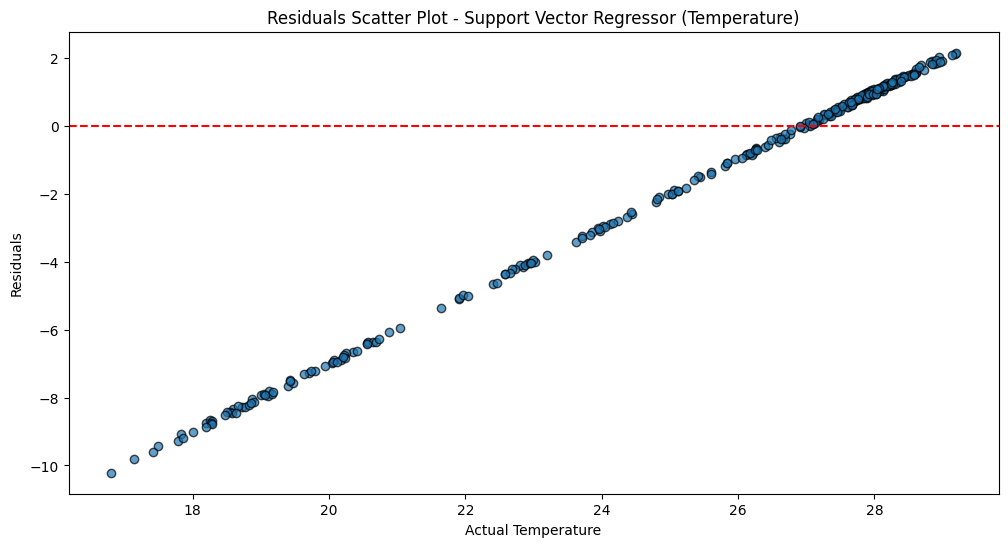

Summary Statistics for Residuals - Support Vector Regressor (Temperature)
count    295.000000
mean      -1.753925
std        3.559788
min      -10.214785
25%       -4.185339
50%        0.064452
75%        0.986888
max        2.153134
Name: tem, dtype: float64




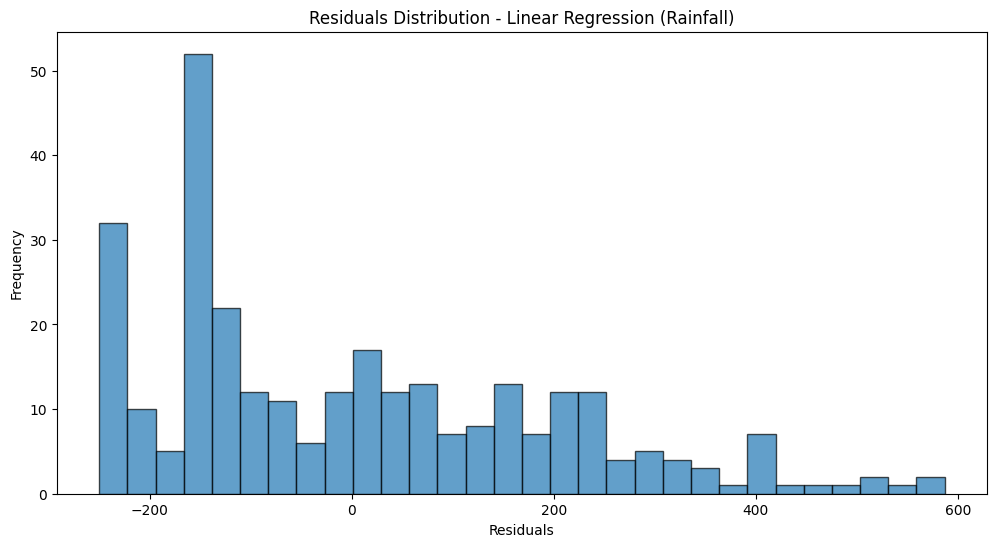

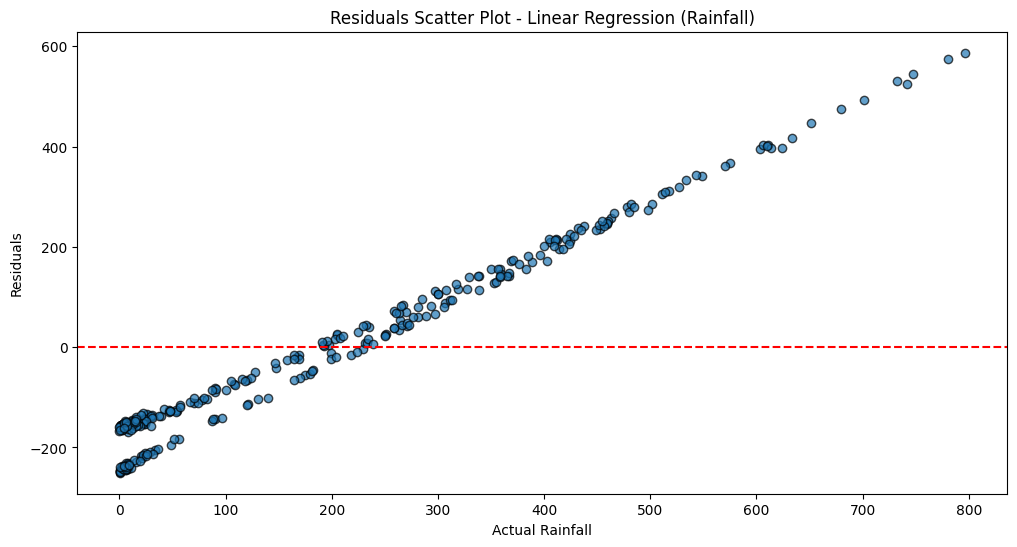

Summary Statistics for Residuals - Linear Regression (Rainfall)
count    295.000000
mean       1.068112
std      194.807357
min     -250.294336
25%     -153.389779
50%      -45.169250
75%      140.980337
max      586.989174
Name: rain, dtype: float64




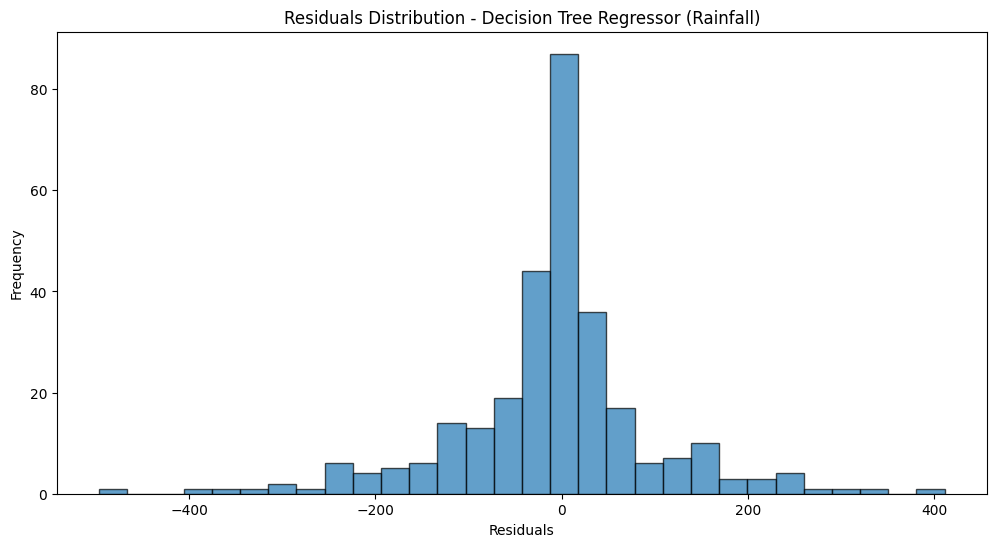

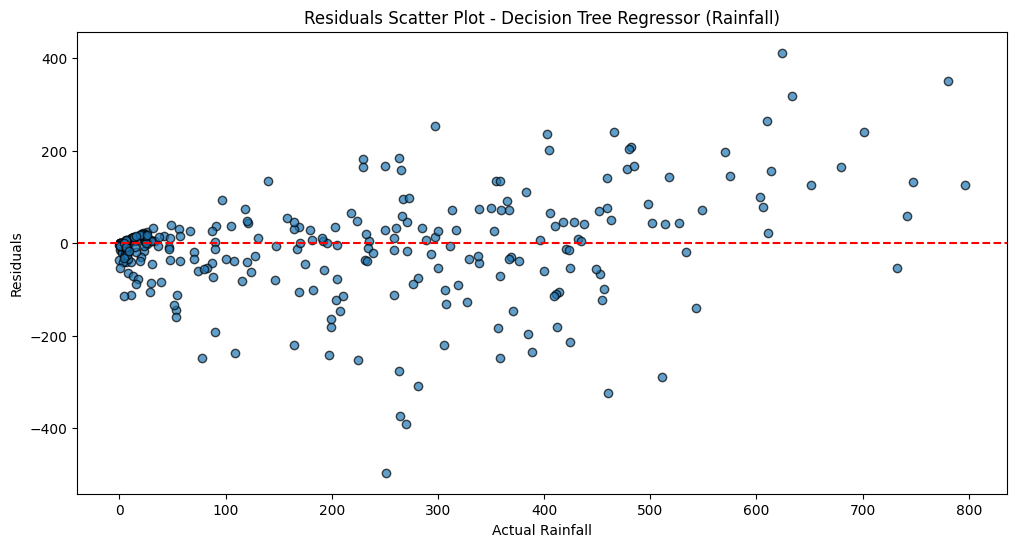

Summary Statistics for Residuals - Decision Tree Regressor (Rainfall)
count    295.000000
mean      -8.854172
std      110.038017
min     -496.590000
25%      -42.855950
50%       -0.768200
75%       30.250300
max      411.416000
Name: rain, dtype: float64




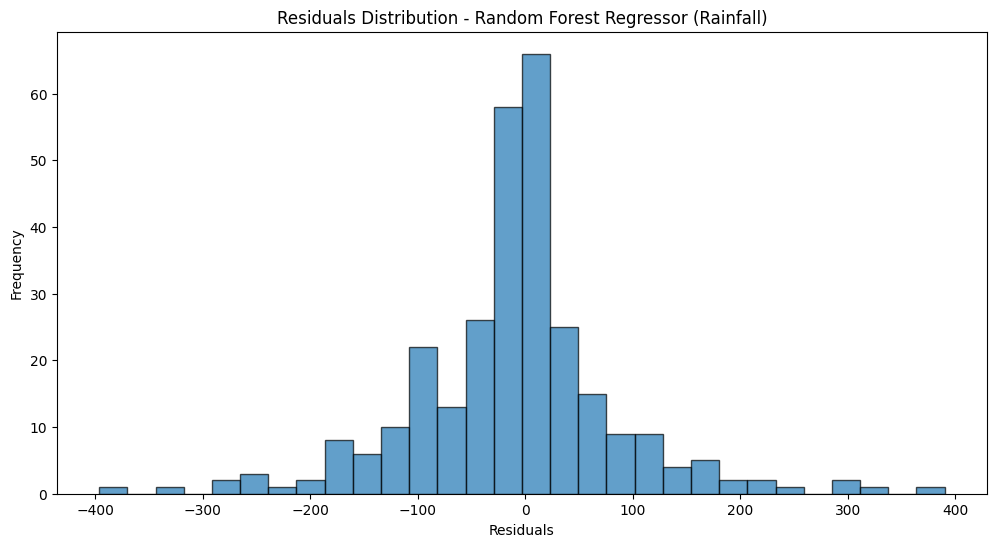

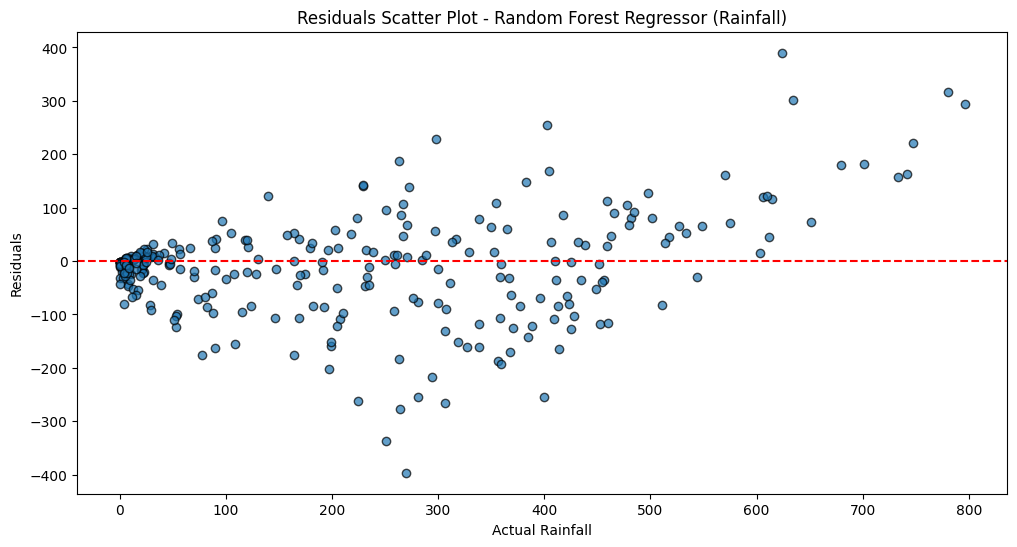

Summary Statistics for Residuals - Random Forest Regressor (Rainfall)
count    295.000000
mean     -10.639481
std       96.253805
min     -396.536810
25%      -46.690241
50%       -4.832112
75%       24.062547
max      390.104670
Name: rain, dtype: float64




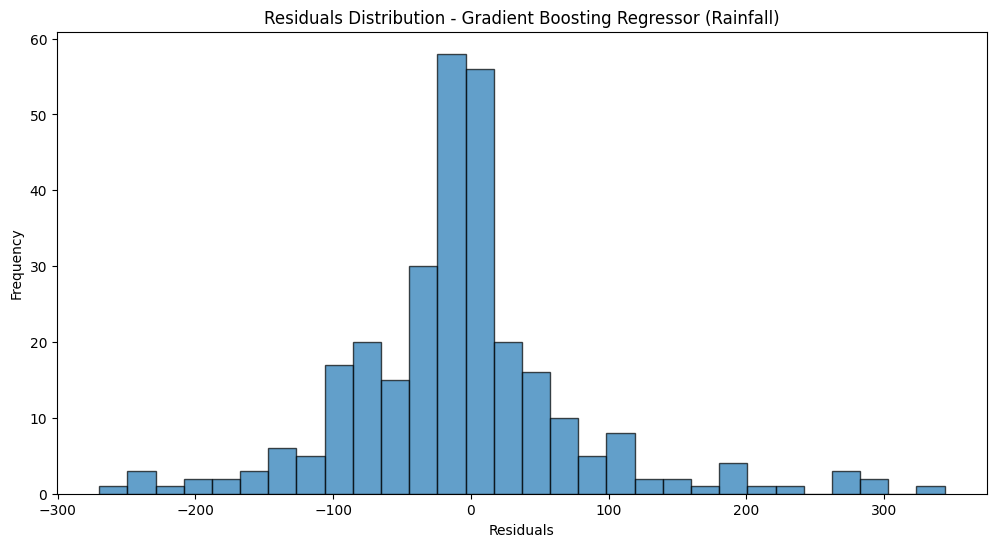

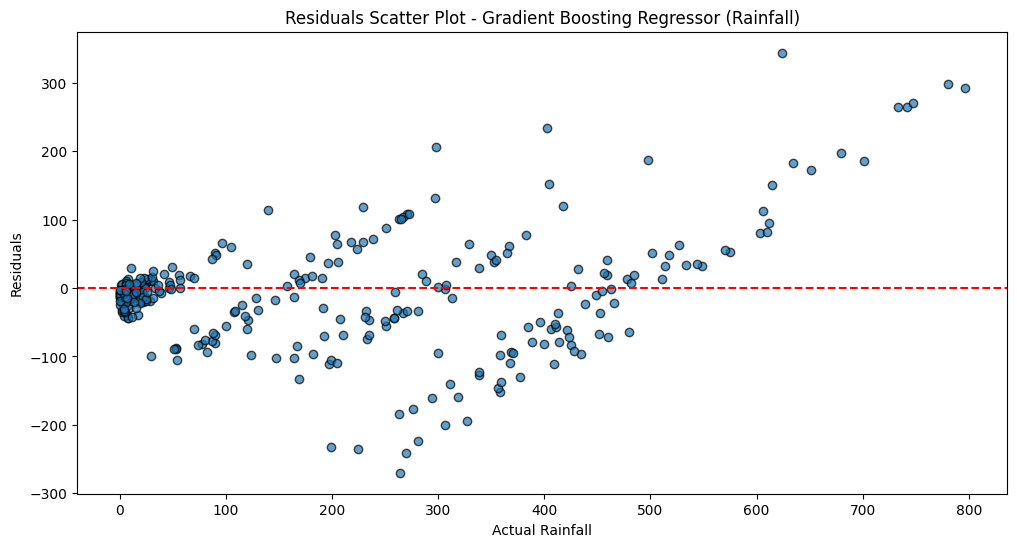

Summary Statistics for Residuals - Gradient Boosting Regressor (Rainfall)
count    295.000000
mean      -8.207996
std       84.660325
min     -269.862618
25%      -45.922008
50%       -9.880060
75%       18.923221
max      343.905197
Name: rain, dtype: float64




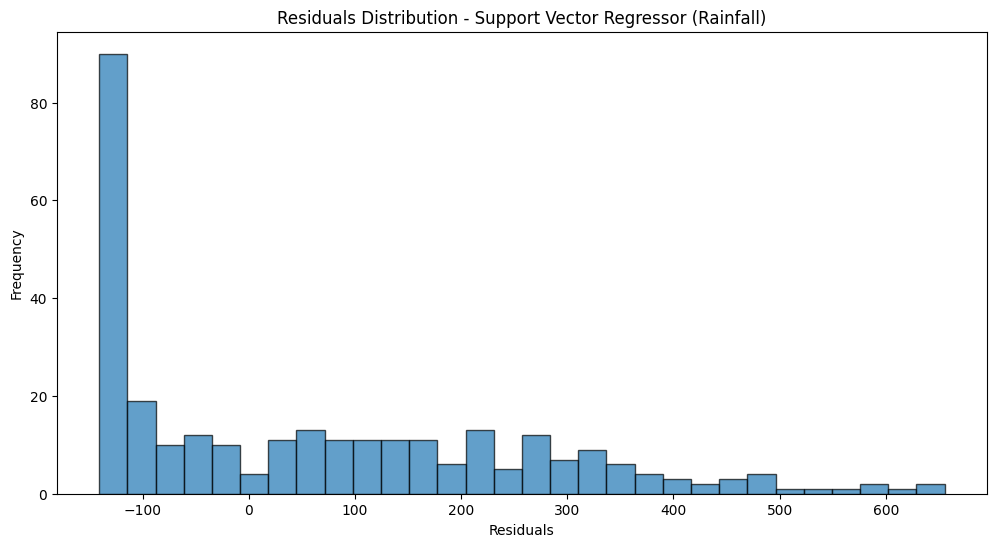

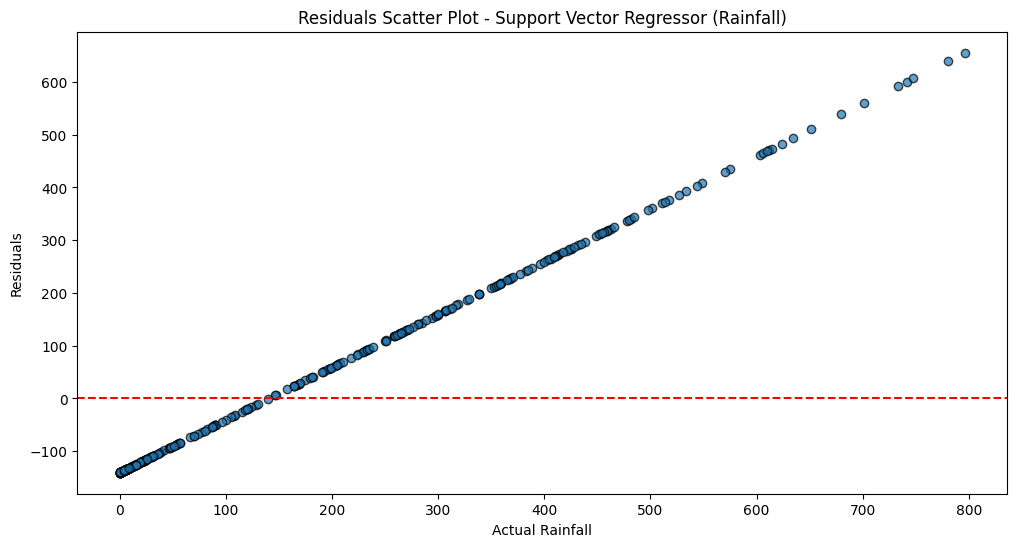

Summary Statistics for Residuals - Support Vector Regressor (Rainfall)
count    295.000000
mean      62.347812
std      197.900034
min     -140.914958
25%     -120.770004
50%       23.790404
75%      212.553231
max      655.378529
Name: rain, dtype: float64




In [ ]:
# Data preparation
features = df[['Month', 'Year']]
target_temp = df['tem']
target_rain = df['rain']

# Split data into training and testing sets
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(features, target_temp, test_size=0.2, random_state=42)
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(features, target_rain, test_size=0.2, random_state=42)

# Function to evaluate models and return MAE, MSE, R2, and residuals
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    residuals = y_test - y_pred
    return mae, mse, r2, residuals

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Evaluate models for temperature prediction
results_temp = []
residuals_temp = {}

for name, model in models.items():
    mae_temp, mse_temp, r2_temp, residuals = evaluate_model(model, X_train_temp, y_train_temp, X_test_temp, y_test_temp)
    results_temp.append({'Model': name, 'MAE': mae_temp, 'MSE': mse_temp, 'R2': r2_temp})
    residuals_temp[name] = residuals

# Evaluate models for rainfall prediction
results_rain = []
residuals_rain = {}

for name, model in models.items():
    mae_rain, mse_rain, r2_rain, residuals = evaluate_model(model, X_train_rain, y_train_rain, X_test_rain, y_test_rain)
    results_rain.append({'Model': name, 'MAE': mae_rain, 'MSE': mse_rain, 'R2': r2_rain})
    residuals_rain[name] = residuals

# Convert results to DataFrame for better visualization
results_temp_df = pd.DataFrame(results_temp)
results_rain_df = pd.DataFrame(results_rain)

# Print the results
print("Temperature Prediction Results")
print(results_temp_df)

print("\nRainfall Prediction Results")
print(results_rain_df)

# Error Analysis - Temperature
for name, residuals in residuals_temp.items():
    plt.figure(figsize=(12, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Residuals Distribution - {name} (Temperature)')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_temp, residuals, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuals Scatter Plot - {name} (Temperature)')
    plt.xlabel('Actual Temperature')
    plt.ylabel('Residuals')
    plt.show()

    print(f'Summary Statistics for Residuals - {name} (Temperature)')
    print(residuals.describe())
    print('\n')

# Error Analysis - Rainfall
for name, residuals in residuals_rain.items():
    plt.figure(figsize=(12, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Residuals Distribution - {name} (Rainfall)')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_rain, residuals, edgecolor='k', alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuals Scatter Plot - {name} (Rainfall)')
    plt.xlabel('Actual Rainfall')
    plt.ylabel('Residuals')
    plt.show()

    print(f'Summary Statistics for Residuals - {name} (Rainfall)')
    print(residuals.describe())
    print('\n')